In [1]:
import os
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from PIL import Image
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization

Using TensorFlow backend.


In [2]:
batch_size = 32
epochs = 100

In [114]:
def load_example(path):
    return np.array(Image.open(path))
    

with open('../dataset/info.txt', 'rt') as f:
    images = f.read().split('\n')[:-1]

x_train = []
y_train = []

def rescale(image):
    shape = image.shape
    if shape == (320,200,4):
        return image
    image = image.tolist()
    if len(image[0]) == 199:
        for el in image:
            el.append([253,253,253,253])
    image.append(image[-1])
    return np.array(image)
        
    

for image in images:    
    x_train.append(rescale(load_example('../dataset/raw/' + image)))
    y_train.append(rescale(load_example('../dataset/marked/' + image)))

x_train = np.array(x_train).astype('float32')
y_train = np.array(y_train).astype('float32')

x_train /= np.max(x_train)
y_train /= np.max(y_train)

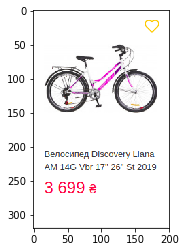

In [115]:
plt.imshow(x_train[0])

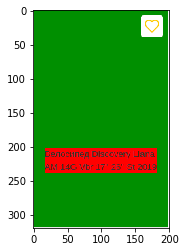

In [180]:
plt.imshow(y_train[0])

In [25]:
shape = x_train.shape[1:]
print(shape)

(319, 199, 4)


In [181]:
input_image = Input(shape=(320, 200, 4))

conv_1 = Conv2D(126, (3, 3), padding='same', activation='relu')(input_image)
batch_1 = BatchNormalization()(conv_1)
conv_2 = Conv2D(126, (3, 3), padding='same', activation='relu')(batch_1)
batch_2 = BatchNormalization()(conv_2)

max_pooling_2 = MaxPooling2D(pool_size=(4, 4))(batch_2)

conv_1_2 = Conv2D(64, (3, 3), padding='same', activation='relu')(max_pooling_2)
batch_1_2 = BatchNormalization()(conv_1_2)
conv_2_2 = Conv2D(64, (3, 3), padding='same', activation='relu')(batch_1_2)
batch_2_2 = BatchNormalization()(conv_2_2)

up_sampling_3 = UpSampling2D((4, 4))(batch_2_2)

conv_3_1 = Conv2D(16, (3, 3), padding='same', activation='relu')(up_sampling_3)
conv_3_2 = Conv2D(16, (3, 3), padding='same', activation='relu')(conv_3_1)

out = Conv2D(4, (3, 3), padding='same', activation='softmax')(conv_3_2)

model = Model(input_image, out)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 320, 200, 4)       0         
_________________________________________________________________
conv2d_136 (Conv2D)          (None, 320, 200, 126)     4662      
_________________________________________________________________
batch_normalization_47 (Batc (None, 320, 200, 126)     504       
_________________________________________________________________
conv2d_137 (Conv2D)          (None, 320, 200, 126)     143010    
_________________________________________________________________
batch_normalization_48 (Batc (None, 320, 200, 126)     504       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 80, 50, 126)       0         
_________________________________________________________________
conv2d_138 (Conv2D)          (None, 80, 50, 64)        72640     
__________

In [186]:
#opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6) #keras.optimizers.Adam(lr=0.0002, beta_1=0.5)
opt = keras.optimizers.Adam(lr=0.0002, decay=1e-6)
# Let's train the model using RMSprop № categorical_crossentropy
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [188]:
model.fit(x_train, y_train,
          batch_size=10,
          epochs=2,
          shuffle=True)

Epoch 1/2
24/24 [==============================] - 39s 2s/step - loss: 0.3656 - acc: 0.7135
Epoch 2/2
24/24 [==============================] - 39s 2s/step - loss: 0.3645 - acc: 0.7129


In [189]:
d = model.predict(np.expand_dims(x_train[8], axis=0))

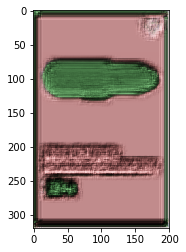

In [190]:
plt.imshow(d[0])